In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.layers import Input, Add, Conv2D, Activation
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import SGD

11501568/11490434 [==============================] - 3s 0us/step


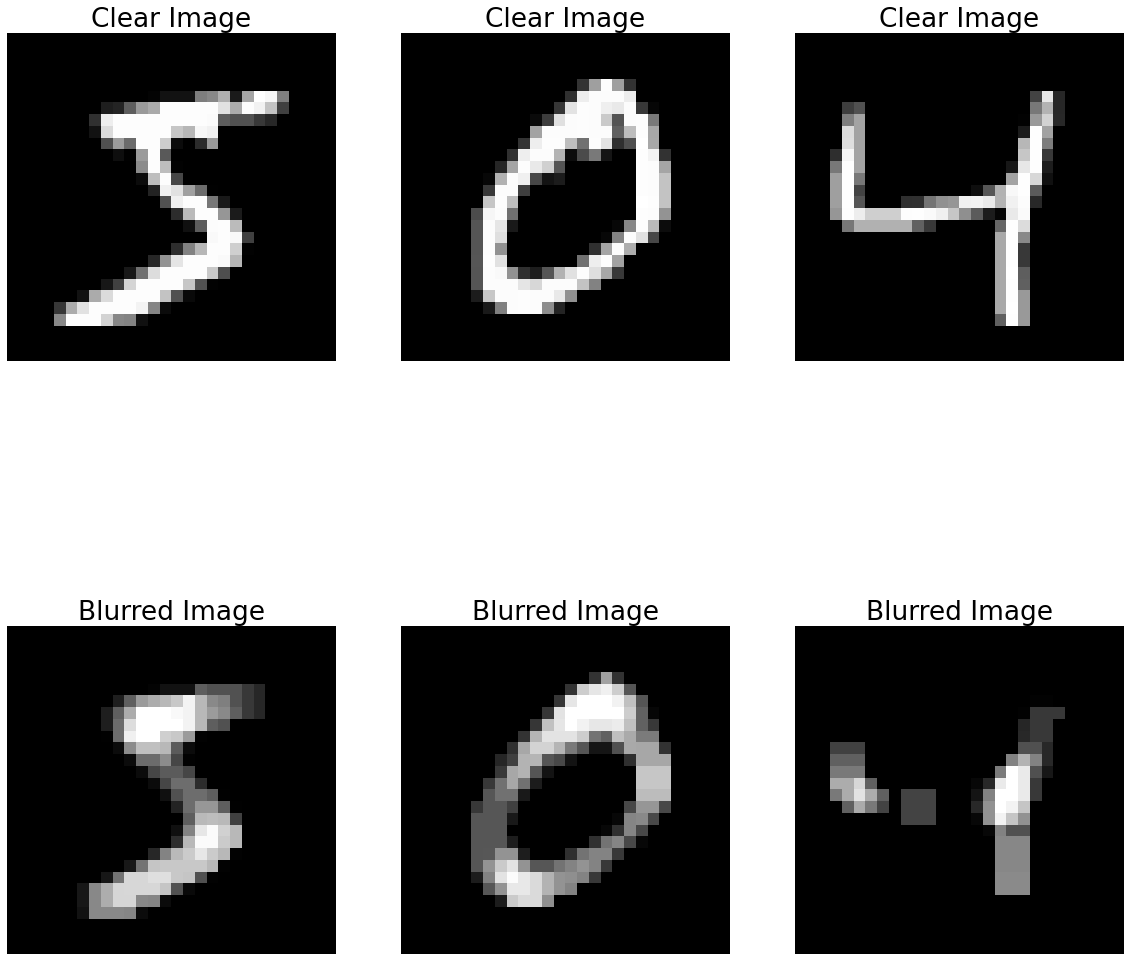

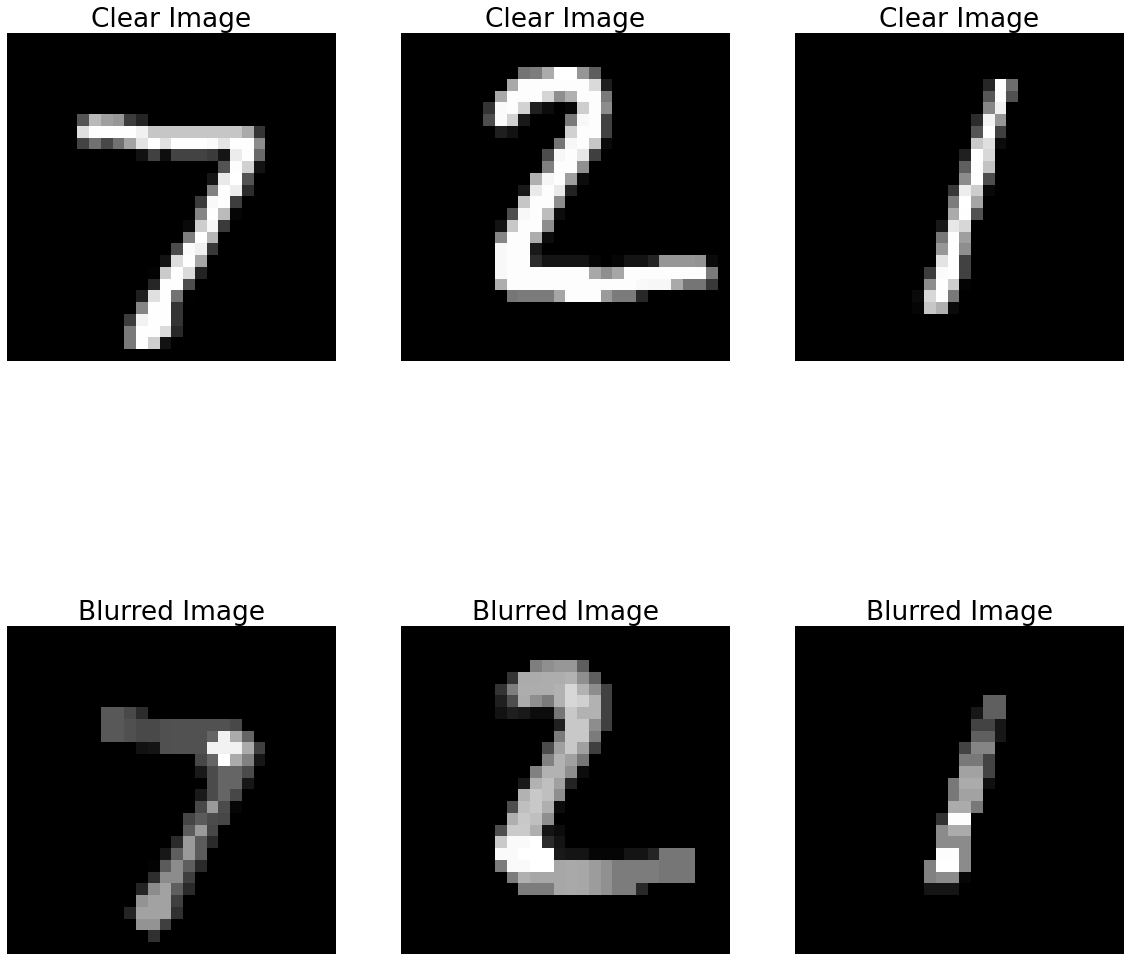

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)


In [7]:
trainX, trainY, testX, testY = prepare_data()

In [10]:
# Train a CNN for deblurring image if pre-trained model is not available.
model_path = 'Deblurring_CNN.h5'
if (os.path.exists(model_path)):
    model = load_model(model_path) 
else:
    model = train_model(trainX, trainY, model_path)

In [11]:
# Test performance of CNN
predictedY = model.predict(testX)

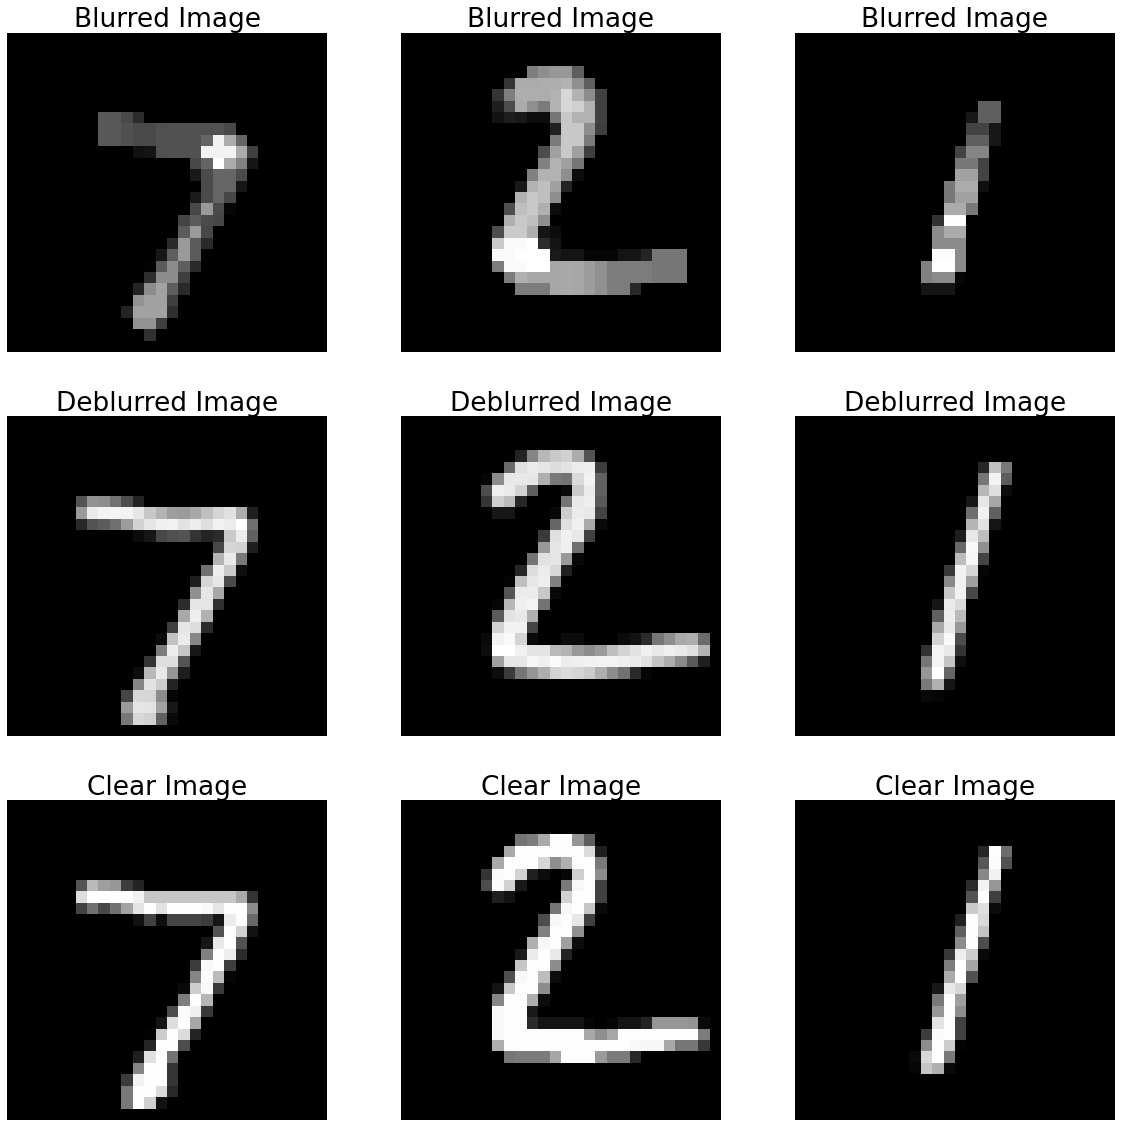

In [13]:
# Plot input, output and target images.
img_set = [testX[:3, :, :, 0], predictedY[:3, :, :, 0], testY[:3, :, :, 0]]
title_set = ['Blurred Image', 'Deblurred Image', 'Clear Image']
fig_path = 'Deblurred_Digits.png'
plot_img(img_set, title_set, fig_path)

In [6]:
def prepare_data():
    # Load data
    (trainX, _), (testX, _) = mnist.load_data()

    # Make image blurred.
    blurred_trainX = generate_blurred_img(trainX)
    blurred_testX = generate_blurred_img(testX)
    print(blurred_trainX.shape, blurred_testX.shape)

    # Turn 2D image into 3D since Conv2D accepts 3D data
    print(trainX.shape)
    trainX = np.expand_dims(trainX, axis = 3)
    print(trainX.shape)

    testX = np.expand_dims(testX, axis = 3)
    blurred_trainX = np.expand_dims(blurred_trainX, axis = 3)
    blurred_testX = np.expand_dims(blurred_testX, axis = 3)

    return blurred_trainX, trainX, blurred_testX, testX

In [5]:
def generate_blurred_img(img_set):
    n = img_set.shape[0]
    blurred_img_set = img_set.copy()
    for i in range(n):
        blurred_img_set[i] = cv2.medianBlur(img_set[i], 5)

    img_set = [img_set[:3], blurred_img_set[:3]]
    title_set = ['Clear Image', 'Blurred Image']
    plot_img(img_set, title_set)

    return blurred_img_set

In [9]:
def train_model(trainX, trainY, model_path):
    # Build the architecture of the model
    _, h, w, ch = trainX.shape
    model = build_model(h, w, ch)

    # Set optimizer, loss function and metrics which are necessary for training any model.
    opt = SGD(learning_rate = 0.0001)
    model.compile(optimizer = opt, loss = 'mse', metrics = ['accuracy'])
    model.fit(trainX, trainY, epochs = 30)

    # Save the entire model to a HDF5 file for future use.
    # The '.h5' extension indicates that the model should be saved to HDF5.
    model_path = '/home/bibrity/DigitalImageProcessing/Deblurring_CNN.h5'
    model.save(model_path)

    return mode

In [4]:
def plot_img(img_set, title_set, fig_path = ''):
    plt.figure(figsize = (20, 20))
    plt.rcParams['font.size'] = 22
    n = len(img_set)
    k = 1
    for i in range(n):
        for j in range(3):
            plt.subplot(n, 3, k)
            plt.imshow(img_set[i][j], cmap = 'gray')
            plt.axis('off')
            plt.title(title_set[i])
            k += 1

    if (fig_path != ''):
        plt.savefig(fig_path)
    plt.show()

In [3]:
def build_model(h, w, ch):
    # The architecture of this CNN was taken from Joon Son Chung, 2017, "You said that"
    # Input layer
    inputs = Input((h, w, ch))

    # Hidden layers
    x = Conv2D(64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(inputs)
    for i in range(8):
        x = Conv2D(64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
    
    # Output layer
    x = Conv2D(3, kernel_size = (3, 3), padding = 'same')(x)
    x = Add()([inputs, x])
    outputs = Activation('relu')(x)

    # Build the model.
    model = Model(inputs, outputs)
    model.summary()
    
    return mode